## 读数据看（已经用ViennaRNA包算出自由能和点括号表达方式）

In [1]:
import pandas as pd
df = pd.read_csv('/Users/ekeulseuji-/Downloads/miRBasev21_MFE_Structure.csv')
df = df.drop(df.columns[0], axis=1) # drop the first column containing the order numbers

In [2]:
df.head()

,hairpin_name,hairpin_seq,dotbracket,fe,arm5p,mature5p_seq,arm3p,mature3p_seq,class
0,hsa-let-7a-1,UGGGAUGAGGUAGUAGGUUGUAUAGUUUUAGGGUCACACCCACCAC...,(((((.(((((((((((((((((((((.....(((...((((.......,-34.2,hsa-let-7a-5p,UGAGGUAGUAGGUUGUAUAGUU,hsa-let-7a-3p,CUAUACAAUCUACUGUCUUUC,False
1,hsa-let-7a-2,AGGUUGAGGUAGUAGGUUGUAUAGUUUAGAAUUACAUCAAGGGAGA...,(((..(((.(((.(((((((((((((.........(((......))...,-25.2,hsa-let-7a-5p,UGAGGUAGUAGGUUGUAUAGUU,hsa-let-7a-2-3p,CUGUACAGCCUCCUAGCUUUCC,False
2,hsa-let-7a-3,GGGUGAGGUAGUAGGUUGUAUAGUUUGGGGCUCUGCCCUGCUAUGG...,(((.(((((((((((((((((((((((((((...)))))).........,-34.1,hsa-let-7a-5p,UGAGGUAGUAGGUUGUAUAGUU,hsa-let-7a-3p,CUAUACAAUCUACUGUCUUUC,False
3,hsa-let-7b,CGGGGUGAGGUAGUAGGUUGUGUGGUUUCAGGGCAGUGAUGUUGCC...,(((((.(((((((((((((((((((((((.((((((.....)))))...,-46.7,hsa-let-7b-5p,UGAGGUAGUAGGUUGUGUGGUU,hsa-let-7b-3p,CUAUACAACCUACUGCCUUCCC,False
4,hsa-let-7c,GCAUCCGGGUUGAGGUAGUAGGUUGUAUGGUUUAGAGUUACACCCU...,((.((((((..(((.(((.(((((((((((((..((.(..((...)...,-31.6,hsa-let-7c-5p,UGAGGUAGUAGGUUGUAUGGUU,hsa-let-7c-3p,CUGUACAACCUUCUAGCUUUCC,False


In [3]:
# heading解释：

# hairpin_name 是 Pre-miRNA分子的id

# hairpin_seq  是 Pre-miRNA序列的具体结构 由AUGC组成 

#                                                                 5' UUC-AUACAAU-UAUUGGCCUCA 3'
# dotbracket   是 根据pair types得到的双链结构表示方法 比如这样            |.|-|||.-.-|-|||||-|||||
#                                                                 3' AUGUUAUA-AUGUAUGAU-GGAGU 5'

# fe           是 利用 ViennaRNA Package中的RNAfold计算得到的 Hairpin free energy 自由能

# arm5p        是 对应的Pre-miRNA序列切割后含mature 5p'序列的单链RNA分子id

# mature5p_seq 是 pre-miRNA在细胞质里被 Dicer酶识别并被剪断成短双链 miRNA分子之后
#                 AGO2蛋白和 Dicer解开并切割成的两个单链RNA分子之一所包含的 mature 5p'序列 由AUGC组成

# arm3p        是 对应的Pre-miRNA序列切割后含mature 3p'序列的单链RNA分子id

# mature3p_seq 是 pre-miRNA在细胞质里被 Dicer酶识别并被剪断成短双链 miRNA分子之后
#                 AGO2蛋白和 Dicer解开并切割成的两个单链RNA分子之一所包含的 mature 3p'序列 由AUGC组成

# class        是 类别 FALSE就说明 Pre-miRNA分子属于 Canonical miRNA （一共有507个）
#                     TRUE就说明 Pre-miRNA分子属于 Mirtrons （一共有216个）

In [4]:
# 转换成包含特征和目标分类的数据集（一共25个特征）

# hairpin_fe    是 利用 ViennaRNA Package中的 RNAfold计算得到的 Harpin free energy 自由能（原样保留）

# hairpin_len   是 Pre-miRNA长度（就是计算序列中包含多少个字母或核苷酸）

# mature5p_len 是 包含 mature 5p序列的单链RNA长度（就是计算序列中包含多少个字母或核苷酸）

# mature3p_len 是 包含 mature 3p序列的单链RNA长度（就是计算序列中包含多少个字母或核苷酸）

# interarm_len 是 arm5p和arm3p序列之间的单链RNA长度（就是计算harpin_len - mature5p_len - mature3p_len）

# n_short_loop 是 长度小于4个核苷酸的环状结构的数量

# n_long_loop  是 长度大于等于4个核苷酸的环状结构的数量

# overhang_len 是 过挂长度 (harpin中茎部未配对核苷酸的数量) (就是计算 (mature5p_len - mature3p_len))
#                 正值表示5'过挂 负值表示3'过挂（表示茎部未配对核苷酸数量的差异）

# terminal_len 是 末端环长度 （hairpin中茎部末端未配对核苷酸的长度）

# mature5p_A   是 包含 mature 5p序列的单链RNA里面的 A content（就是计算序列中包含多少个字母A）
# mature3p_A   是 包含 mature 3p序列的单链RNA里面的 A content（就是计算序列中包含多少个字母A）
# interarm_A   是 arm5p和arm3p序列之间的单链RNA里面的 A content（就是计算序列中包含多少个字母A）
# hairpin_A     是 整个发夹结构里面的 A content（就是计算序列中包含多少个字母A）

# mature5p_U   是 包含 mature 5p序列的单链RNA里面的 U content（就是计算序列中包含多少个字母U）
# mature3p_U   是 包含 mature 3p序列的单链RNA里面的 U content（就是计算序列中包含多少个字母U）
# interarm_U   是 arm5p和arm3p序列之间的单链RNA里面的 U content（就是计算序列中包含多少个字母U）
# hairpin_U     是 整个发夹结构里面的 U content（就是计算序列中包含多少个字母U）

# mature5p_G   是 包含 mature 5p序列的单链RNA里面的 G content（就是计算序列中包含多少个字母G）
# mature3p_G   是 包含 mature 3p序列的单链RNA里面的 G content（就是计算序列中包含多少个字母G）
# interarm_G   是 arm5p和arm3p序列之间的单链RNA里面的 G content（就是计算序列中包含多少个字母G）
# hairpin_G     是 整个发夹结构里面的 G content（就是计算序列中包含多少个字母G）

# mature5p_C   是 包含 mature 5p序列的单链RNA里面的 C content（就是计算序列中包含多少个字母C）
# mature3p_C   是 包含 mature 3p序列的单链RNA里面的 C content（就是计算序列中包含多少个字母C）
# interarm_C   是 arm5p和arm3p序列之间的单链RNA里面的 C content（就是计算序列中包含多少个字母C）
# hairpin_C     是 整个发夹结构里面的 C content（就是计算序列中包含多少个字母C）


## 把原数据拆成能用的特征

In [5]:
def count_long_loops(sequence): # 例如输入(((..(((.(((.(((((.....)))).))).))).)))
    stack = []
    n_long_loop = 0
    
    # 遍历每个dot或者bracket
    for db in sequence:
        if db == '(' or db == '.':
            stack.append(db)
            
        elif db == ')': # 此时有 stack: (((..(((.(((.(((((.....
            dot_count = 0
            while stack[-1] == '.':
                stack.pop()
                dot_count = dot_count+1
            
            # 结束后 stack: (((..(((.(((.(((((
            if dot_count >= 4:
                n_long_loop += 1
            
            # pop掉对应的()括号对
            stack.pop()
                        
    return n_long_loop

In [6]:
def count_short_loops(sequence): # 例如输入(((..(((.(((.(((((.....)))).))).))).)))
    stack = []
    n_short_loop = 0
    
    # 遍历每个dot或者bracket
    for db in sequence:
        if db == '(' or db == '.':
            stack.append(db)
            
        elif db == ')': # 此时有 stack: (((..(((.(((.(((((.....
            dot_count = 0
            while stack[-1] == '.':
                stack.pop()
                dot_count = dot_count+1

            if ((dot_count > 0) and (dot_count < 4)):
                n_short_loop += 1
            
            # pop掉对应的()括号对
            stack.pop()
                        
    return n_short_loop

In [7]:
# 建新的 dataframe
new_df = pd.DataFrame()

# 添加特征列

# 保持原样 hairpin自由能
new_df['hairpin_fe'] = df['fe']

# 发夹和两个mature部分的长度
new_df['hairpin_len'] = df['hairpin_seq'].apply(len)
new_df['mature5p_len'] = df['mature5p_seq'].apply(len)
new_df['mature3p_len'] = df['mature3p_seq'].apply(len)

# hairpin序列中非mature5p和mature3p序列的长度
new_df['interarm_len'] = new_df['hairpin_len'] - new_df['mature5p_len'] - new_df['mature3p_len']

# 例 (((..(((.(((.(((((((((((((.........(((......)))))))))))))))).))).))).)))
# 环形结构有 (......) (..........) (..) (..) (...）
# n_short_loop = 3
# n_long_loop = 2

# 计算短环的数量
new_df['n_short_loop'] = df['dotbracket'].apply(count_short_loops)

# 计算长环的数量
new_df['n_long_loop'] = df['dotbracket'].apply(count_long_loops)

# 过挂长度
new_df['overhang_len'] = new_df['mature5p_len'] - new_df['mature3p_len']

# 未配对核苷酸形成环状结构的长度（计算dotbracket中第一个分隔符之前的长度）
# 如果dotbracket中有出现分隔符 '-' 则使用分隔符之前的字符串长度作为结果/否则结果为0
new_df['terminal_len'] = df['dotbracket'].apply(lambda x: len(x.split('-')[0]) if '-' in x else 0)

# 发夹和两个mature部分的 A含量
new_df['mature5p_A'] = df['mature5p_seq'].apply(lambda x: x.count('A'))
new_df['mature3p_A'] = df['mature3p_seq'].apply(lambda x: x.count('A'))
new_df['hairpin_A'] = df['hairpin_seq'].apply(lambda x: x.count('A'))

# hairpin序列中非mature5p和mature3p序列的 A含量
new_df['interarm_A'] = new_df['hairpin_A'] - new_df['mature5p_A'] - new_df['mature3p_A']

# 发夹和两个mature部分的 U含量
new_df['mature5p_U'] = df['mature5p_seq'].apply(lambda x: x.count('U'))
new_df['mature3p_U'] = df['mature3p_seq'].apply(lambda x: x.count('U'))
new_df['hairpin_U'] = df['hairpin_seq'].apply(lambda x: x.count('U'))

# hairpin序列中非mature5p和mature3p序列的 U含量
new_df['interarm_U'] = new_df['hairpin_U'] - new_df['mature5p_U'] - new_df['mature3p_U']

# 发夹和两个mature部分的 G含量
new_df['mature5p_G'] = df['mature5p_seq'].apply(lambda x: x.count('G'))
new_df['mature3p_G'] = df['mature3p_seq'].apply(lambda x: x.count('G'))
new_df['hairpin_G'] = df['hairpin_seq'].apply(lambda x: x.count('G'))

# hairpin序列中非mature5p和mature3p序列的 G含量
new_df['interarm_G'] = new_df['hairpin_G'] - new_df['mature5p_G'] - new_df['mature3p_G']

# 发夹和两个mature部分的 C含量
new_df['mature5p_C'] = df['mature5p_seq'].apply(lambda x: x.count('C'))
new_df['mature3p_C'] = df['mature3p_seq'].apply(lambda x: x.count('C'))
new_df['hairpin_C'] = df['hairpin_seq'].apply(lambda x: x.count('C'))

# hairpin序列中非mature5p和mature3p序列的 C含量
new_df['interarm_C'] = new_df['hairpin_C'] - new_df['mature5p_C'] - new_df['mature3p_C']

# 保持原样 pre-miRNA的分类
new_df['class'] = df['class']

In [8]:
new_df.head()

,hairpin_fe,hairpin_len,mature5p_len,mature3p_len,interarm_len,n_short_loop,n_long_loop,overhang_len,terminal_len,mature5p_A,...,interarm_U,mature5p_G,mature3p_G,hairpin_G,interarm_G,mature5p_C,mature3p_C,hairpin_C,interarm_C,class
0,-34.2,80,22,21,37,1,3,1,0,5,...,7,8,1,19,10,0,6,15,9,False
1,-25.2,72,22,22,28,3,2,0,0,5,...,7,8,3,18,7,0,9,11,2,False
2,-34.1,74,22,21,31,2,1,1,0,5,...,8,8,1,21,12,0,6,13,7,False
3,-46.7,83,22,22,39,1,3,0,0,3,...,8,10,1,26,15,0,10,18,8,False
4,-31.6,84,22,22,40,6,2,0,0,4,...,10,9,2,24,13,0,8,16,8,False


## 做特征选择

In [9]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier # 随机森林
from xgboost.sklearn import XGBRegressor # 做特征选择
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV  # 划分数据集/选超参

# 模型表现的标准
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, average_precision_score, confusion_matrix 

# 做特征选择
import shap
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

/Users/ekeulseuji-/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
# 特征列 independent variables 
X = new_df.iloc[:, :-1]  

# 目标类别列 TRUE/FALSE target variable
y = new_df['class']  

### 创建XGBRegressor模型 进行训练拟合

In [11]:
XGBmodel = XGBRegressor(n_estimators=1000, max_depth=10, learning_rate=0.001)
XGBmodel.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

### 加载可视化模型

In [12]:
# java script可视化
shap.initjs()
explainer = shap.TreeExplainer(XGBmodel)
shap_values = explainer.shap_values(X)

### 展示对模型输出做贡献的特征

In [13]:
i = 4
shap.force_plot(explainer.expected_value, shap_values[i], features=X.iloc[i], feature_names=X.columns)

### 绘制出每个样本的每个特征的SHAP值

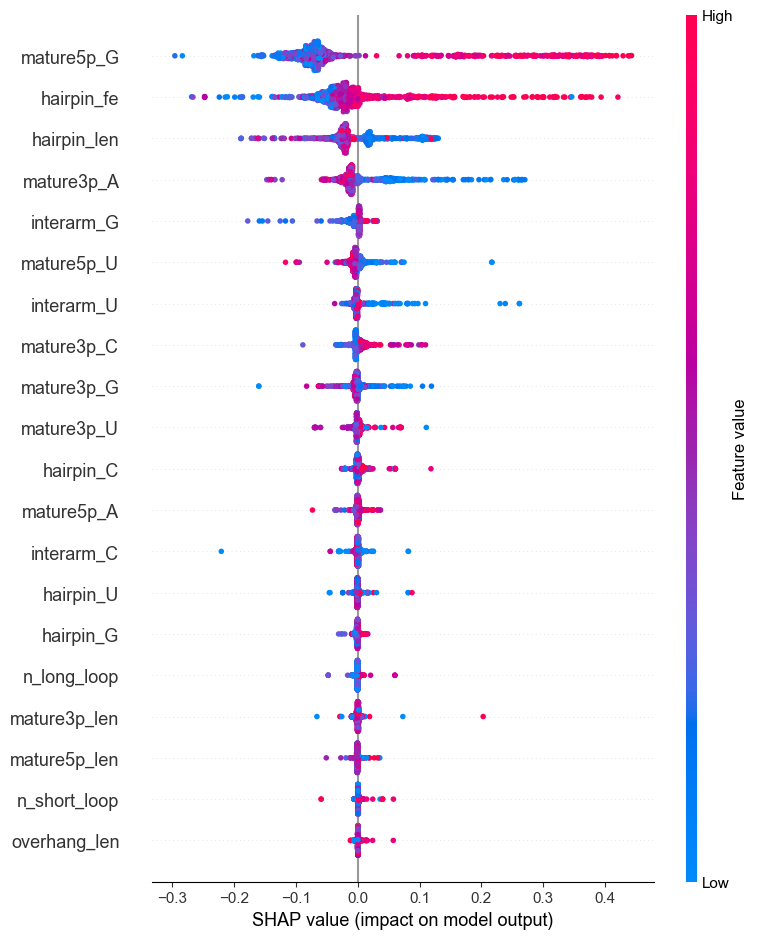

In [14]:
shap.summary_plot(shap_values, features=X, feature_names=X.columns)

### 展示每个特征的SHAP值的均值绝对值标准条形图

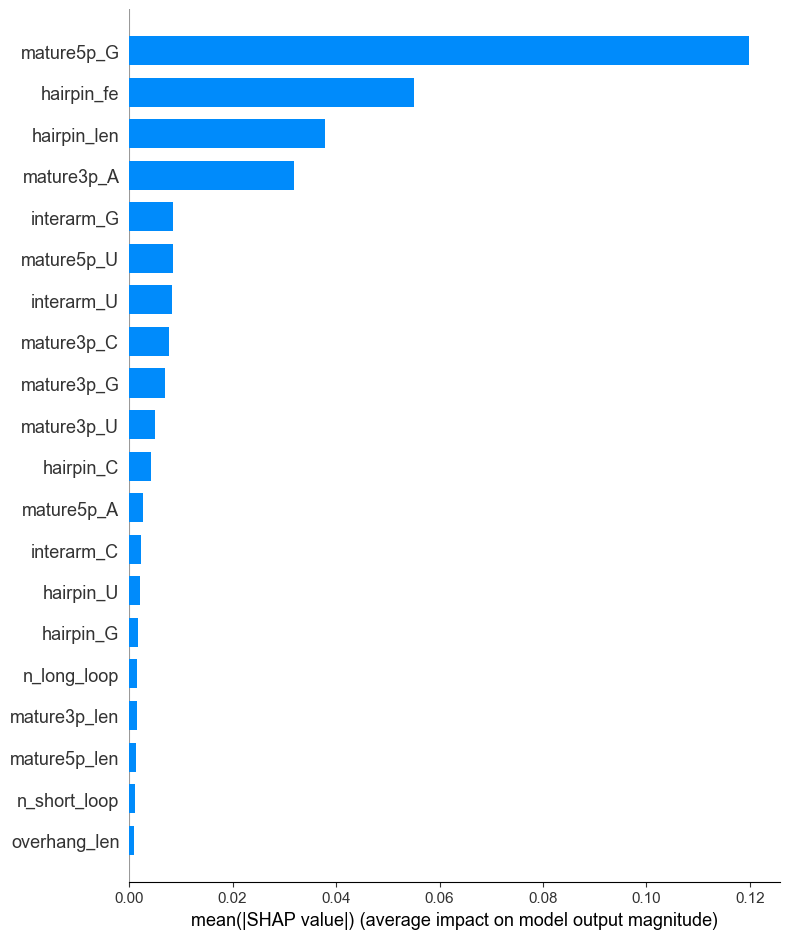

In [15]:
shap.summary_plot(shap_values, features=X, feature_names=X.columns, plot_type='bar')

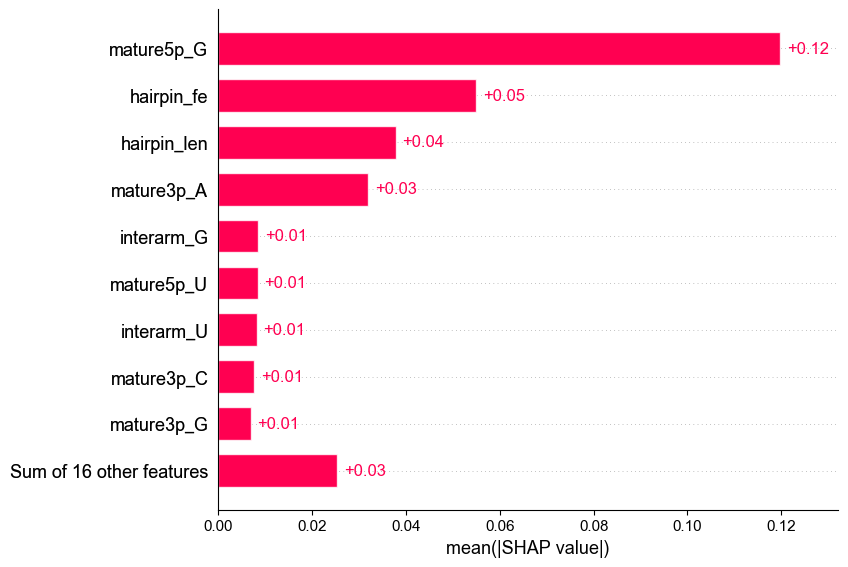

In [16]:
shap_values2 = explainer(X)
shap.plots.bar(shap_values2)

### 根据shap值选择10个最优特征 把列名存到Selected_Features里面

In [17]:
# 每个特征的平均绝对SHAP值
mean_abs_shap_values = np.abs(shap_values).mean(axis=0)

# 根据shap值 从高到低对特征进行排序
sorted_features = sorted(zip(X.columns, mean_abs_shap_values), key=lambda x: x[1], reverse=True)

# 取前10个最优特征
Selected_Features = [feature for feature, _ in sorted_features[:10]]

In [18]:
Selected_Features

['mature5p_G',
 'hairpin_fe',
 'hairpin_len',
 'mature3p_A',
 'interarm_G',
 'mature5p_U',
 'interarm_U',
 'mature3p_C',
 'mature3p_G',
 'mature3p_U']

## 综合选择  逻辑回归L2 反向特征选择 选出来的特征

In [19]:
# 剔除不需要的特征列
new_X = X[Selected_Features]

In [20]:
# 划分 训练集：验证集：测试集
#       6  ：  2  ：  2

# 训练集+验证集 8：2 测试集
X_tv, X_test, y_tv, y_test = train_test_split(new_X, y, test_size=0.2, random_state=10086)

# 训练集 4：1 验证集（剩下8份里面）
X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv, test_size=0.25, random_state=10086)

# 用GA-BP模型

In [21]:
import torch
import pygad
import torchga
import numpy

from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from imblearn.metrics import geometric_mean_score
import seaborn as sns

# 存每代的损失和准确率
losses = []
accuracies = []

In [22]:
# 流程

# 初始化种群：用遗传算法的idea 随机生成一组初始的神经网络权重和偏置的种群

# 评估适应度：对每个个体（即神经网络）用反向传播算法计算其在训练集上的损失函数值 并将其作为适应度评估个体的优劣
# 选择操作：根据适应度值 使用选择算子（如轮盘赌选择 各个个体被选中的概率和适应度函数成正比）从种群中选出一部分个体作为母代
# 交叉操作：对于选中的母代个体 使用交叉算子（如单点交叉或多点交叉）生成新的子代个体
# 变异操作：对于生成的子代个体 使用变异算子（如位变异或高斯变异）对其进行随机变异（增加种群的多样性）
# 更新种群：把母代和子代个体合并形成新的种群
# （重复前面五个步骤直到达到停止条件（如达到最大迭代次数或达到期望的适应度值））

# 选择最优个体：根据适应度值选择种群中适应度最好的个体作为最终的神经网络模型
# 使用最优个体进行预测：用选择出的最优个体进行测试集上的预测评估模型的性能

### 获取适应度（适应度方程）

In [23]:
def fitness_func(ga_instanse, solution, sol_idx):
    global data_inputs, data_outputs, torch_ga, model, loss_function
    
    predictions = torch.sigmoid(torchga.predict(model=model, solution=solution, data=data_inputs))

    # predictions = torchga.predict(model=model, solution=solution, data=data_inputs)

    solution_fitness = 1.0 / (loss_function(predictions, data_outputs).detach().numpy() + 0.00000001)

    return solution_fitness

### 在每代遗传算法进化过程中 输出当前的世代数和适应度 而且存一下损失和准确率方便之后画折线

In [24]:
def callback_generation(ga_instance):
    
    print('Generation = {generation}'.format(generation=ga_instance.generations_completed))
    print('Fitness    = {fitness}'.format(fitness=ga_instance.best_solution()[1]))
    
    # 存每代的损失和准确率
    # losses = []
    # accuracies = []
    
    # 当前最佳权重
    best_solution_weights = torchga.model_weights_as_dict(model=model, weights_vector=ga_instance.best_solution()[0])
    
    # 用到神经网络里 用验证集算损失和准确率
    model.load_state_dict(best_solution_weights)
    
    # 在每一代结束时进行验证 
    # 验证集输入
    val_inputs = torch.from_numpy(X_val.values).float()
    
    val_outputs = torch.from_numpy(y_val.values).float()
    val_outputs= val_outputs.reshape((val_outputs.shape[0], 1))
    
    # 进行预测 这里 val_predictions输出的是概率 然后用BCEWithLogitsLoss()算了损失
    val_predictions = model(val_inputs)
    val_loss = loss_function(val_predictions, val_outputs).detach().numpy()
    
    # 将概率值转换为包含0和1的预测目标列
    val_predicted_labels = (val_predictions >= threshold).int()
    val_true_labels = val_outputs
    val_accuracy = (val_predicted_labels == val_true_labels).sum().item() / len(val_true_labels)
    
    # val_accuracy = torch.sum(torch.max(val_predictions, axis=1).indices == val_outputs) / len(val_outputs)
    
    print('Val Loss:', val_loss)
    print('Val Accuracy:', val_accuracy)

    
    losses.append(val_loss)
    accuracies.append(val_accuracy)

### BP神经网络主函数

In [25]:
input_layer = torch.nn.Linear(in_features=10, out_features=5)
relu_layer1 = torch.nn.ReLU()

dense_layer = torch.nn.Linear(in_features=5, out_features=3)
relu_layer2 = torch.nn.ReLU()

output_layer = torch.nn.Linear(in_features=3, out_features=1)

sigmoid_layer = torch.nn.Sigmoid()

model = torch.nn.Sequential(input_layer,
                            relu_layer1,
                            dense_layer,
                            relu_layer2,
                            output_layer,
                            sigmoid_layer)

# 建pygad.torchga.TorchGA类的实例 产生初始种群（num_solutions=30表示初始种群将包含35个个体）
torch_ga = torchga.TorchGA(model=model,
                           num_solutions=35)

loss_function = torch.nn.BCEWithLogitsLoss()

### 输入/输出数据

In [26]:
# 将输入数据转换为张量并进行形状调整
data_inputs = torch.from_numpy(X_train.values).float()

# 将输出数据转换为张量
data_outputs = torch.from_numpy(y_train.values).float()
data_outputs= data_outputs.reshape((data_outputs.shape[0], 1))

In [27]:
# data_inputs

In [28]:
# data_outputs

### PyGAD 参数设置

In [29]:
# 进化代数
num_generations = 2500

# 在备选池中被选为亲本的解（个体）的数量
num_parents_mating = 12

# 初始种群（初始网络权重）
initial_population = torch_ga.population_weights 

# 设置阈值 预测值大于这个就是分类成1 小于就分类成0
threshold = 0.5

# 选择算子的类型 rws是轮盘赌选择 Roulette Wheel Selection
parent_selection_type = 'rws'

# 交叉算子类型 单点交叉
crossover_type = 'single_point'

# 变异算子类型 随机变异
mutation_type = 'random'

# 设置基因突变的百分比
mutation_percent_genes = 25

# 下一世代的种群要保留的父母代数量
# （-1表示保留所有父母 0表示不保留任何父母）
keep_parents = -1 

### 建一个 pygad.GA 类下的实例 ga_instance

In [30]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       parent_selection_type=parent_selection_type,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       keep_parents=keep_parents,
                       on_generation=callback_generation)  # 就是把上面的参数全扔进去了

# 开始遗传进化
ga_instance.run()

Generation = 1
Fitness    = 1.1625837455566626
Val Loss: 0.6931469
Val Accuracy: 0.7945945945945946
Generation = 2
Fitness    = 1.162593010225466
Val Loss: 0.69312274
Val Accuracy: 0.7945945945945946
Generation = 3
Fitness    = 1.162593010225466
Val Loss: 0.69312274
Val Accuracy: 0.7945945945945946
Generation = 4
Fitness    = 1.162593010225466
Val Loss: 0.69312274
Val Accuracy: 0.7945945945945946
Generation = 5
Fitness    = 1.162593010225466
Val Loss: 0.69312274
Val Accuracy: 0.7945945945945946
Generation = 6
Fitness    = 1.162593010225466
Val Loss: 0.69312274
Val Accuracy: 0.7945945945945946
Generation = 7
Fitness    = 1.1627864741275056
Val Loss: 0.6919954
Val Accuracy: 0.8
Generation = 8
Fitness    = 1.1627864741275056
Val Loss: 0.6919954
Val Accuracy: 0.8
Generation = 9
Fitness    = 1.1627864741275056
Val Loss: 0.6919954
Val Accuracy: 0.8
Generation = 10
Fitness    = 1.1627864741275056
Val Loss: 0.6919954
Val Accuracy: 0.8
Generation = 11
Fitness    = 1.1627864741275056
Val Loss: 0

Val Loss: 0.66496503
Val Accuracy: 0.8972972972972973
Generation = 86
Fitness    = 1.172085771190076
Val Loss: 0.66496503
Val Accuracy: 0.8972972972972973
Generation = 87
Fitness    = 1.172085771190076
Val Loss: 0.66496503
Val Accuracy: 0.8972972972972973
Generation = 88
Fitness    = 1.172085771190076
Val Loss: 0.66496503
Val Accuracy: 0.8972972972972973
Generation = 89
Fitness    = 1.172085771190076
Val Loss: 0.66496503
Val Accuracy: 0.8972972972972973
Generation = 90
Fitness    = 1.172085771190076
Val Loss: 0.66496503
Val Accuracy: 0.8972972972972973
Generation = 91
Fitness    = 1.172085771190076
Val Loss: 0.66496503
Val Accuracy: 0.8972972972972973
Generation = 92
Fitness    = 1.172085771190076
Val Loss: 0.66496503
Val Accuracy: 0.8972972972972973
Generation = 93
Fitness    = 1.172085771190076
Val Loss: 0.66496503
Val Accuracy: 0.8972972972972973
Generation = 94
Fitness    = 1.172085771190076
Val Loss: 0.66496503
Val Accuracy: 0.8972972972972973
Generation = 95
Fitness    = 1.172085

Fitness    = 1.1758212300058775
Val Loss: 0.65911484
Val Accuracy: 0.9081081081081082
Generation = 169
Fitness    = 1.1758212300058775
Val Loss: 0.65911484
Val Accuracy: 0.9081081081081082
Generation = 170
Fitness    = 1.1758212300058775
Val Loss: 0.65911484
Val Accuracy: 0.9081081081081082
Generation = 171
Fitness    = 1.1758212300058775
Val Loss: 0.65911484
Val Accuracy: 0.9081081081081082
Generation = 172
Fitness    = 1.1758212300058775
Val Loss: 0.65911484
Val Accuracy: 0.9081081081081082
Generation = 173
Fitness    = 1.1758212300058775
Val Loss: 0.65911484
Val Accuracy: 0.9081081081081082
Generation = 174
Fitness    = 1.1758212300058775
Val Loss: 0.65911484
Val Accuracy: 0.9081081081081082
Generation = 175
Fitness    = 1.1758212300058775
Val Loss: 0.65911484
Val Accuracy: 0.9081081081081082
Generation = 176
Fitness    = 1.1758212300058775
Val Loss: 0.65911484
Val Accuracy: 0.9081081081081082
Generation = 177
Fitness    = 1.1758212300058775
Val Loss: 0.65911484
Val Accuracy: 0.9081

Val Loss: 0.6496822
Val Accuracy: 0.9297297297297298
Generation = 252
Fitness    = 1.1769029886194968
Val Loss: 0.6496822
Val Accuracy: 0.9297297297297298
Generation = 253
Fitness    = 1.1769029886194968
Val Loss: 0.6496822
Val Accuracy: 0.9297297297297298
Generation = 254
Fitness    = 1.1769029886194968
Val Loss: 0.6496822
Val Accuracy: 0.9297297297297298
Generation = 255
Fitness    = 1.1769029886194968
Val Loss: 0.6496822
Val Accuracy: 0.9297297297297298
Generation = 256
Fitness    = 1.1769029886194968
Val Loss: 0.6496822
Val Accuracy: 0.9297297297297298
Generation = 257
Fitness    = 1.1769029886194968
Val Loss: 0.6496822
Val Accuracy: 0.9297297297297298
Generation = 258
Fitness    = 1.1769029886194968
Val Loss: 0.6496822
Val Accuracy: 0.9297297297297298
Generation = 259
Fitness    = 1.1769029886194968
Val Loss: 0.6496822
Val Accuracy: 0.9297297297297298
Generation = 260
Fitness    = 1.1769029886194968
Val Loss: 0.6496822
Val Accuracy: 0.9297297297297298
Generation = 261
Fitness    =

Fitness    = 1.1775581240280133
Val Loss: 0.65649825
Val Accuracy: 0.9081081081081082
Generation = 335
Fitness    = 1.1775581240280133
Val Loss: 0.65649825
Val Accuracy: 0.9081081081081082
Generation = 336
Fitness    = 1.1781091638429895
Val Loss: 0.65391326
Val Accuracy: 0.918918918918919
Generation = 337
Fitness    = 1.1781091638429895
Val Loss: 0.65391326
Val Accuracy: 0.918918918918919
Generation = 338
Fitness    = 1.1782144029312507
Val Loss: 0.6552553
Val Accuracy: 0.9135135135135135
Generation = 339
Fitness    = 1.1782144029312507
Val Loss: 0.6552553
Val Accuracy: 0.9135135135135135
Generation = 340
Fitness    = 1.1782144029312507
Val Loss: 0.6552553
Val Accuracy: 0.9135135135135135
Generation = 341
Fitness    = 1.1782144029312507
Val Loss: 0.6552553
Val Accuracy: 0.9135135135135135
Generation = 342
Fitness    = 1.1782144029312507
Val Loss: 0.6552553
Val Accuracy: 0.9135135135135135
Generation = 343
Fitness    = 1.1782144029312507
Val Loss: 0.6552553
Val Accuracy: 0.913513513513

Fitness    = 1.1783533440099314
Val Loss: 0.65576124
Val Accuracy: 0.9135135135135135
Generation = 415
Fitness    = 1.1783533440099314
Val Loss: 0.65576124
Val Accuracy: 0.9135135135135135
Generation = 416
Fitness    = 1.1783539233444886
Val Loss: 0.65576243
Val Accuracy: 0.9135135135135135
Generation = 417
Fitness    = 1.1783539233444886
Val Loss: 0.65576243
Val Accuracy: 0.9135135135135135
Generation = 418
Fitness    = 1.1783539233444886
Val Loss: 0.65576243
Val Accuracy: 0.9135135135135135
Generation = 419
Fitness    = 1.1783539233444886
Val Loss: 0.65576243
Val Accuracy: 0.9135135135135135
Generation = 420
Fitness    = 1.1783539233444886
Val Loss: 0.65576243
Val Accuracy: 0.9135135135135135
Generation = 421
Fitness    = 1.1783539233444886
Val Loss: 0.65576243
Val Accuracy: 0.9135135135135135
Generation = 422
Fitness    = 1.1783539233444886
Val Loss: 0.65576243
Val Accuracy: 0.9135135135135135
Generation = 423
Fitness    = 1.1783539233444886
Val Loss: 0.65576243
Val Accuracy: 0.9135

Fitness    = 1.1783539233444886
Val Loss: 0.65576243
Val Accuracy: 0.9135135135135135
Generation = 495
Fitness    = 1.1783539233444886
Val Loss: 0.65576243
Val Accuracy: 0.9135135135135135
Generation = 496
Fitness    = 1.1785744428936864
Val Loss: 0.6537094
Val Accuracy: 0.918918918918919
Generation = 497
Fitness    = 1.1785744428936864
Val Loss: 0.6537094
Val Accuracy: 0.918918918918919
Generation = 498
Fitness    = 1.1785744428936864
Val Loss: 0.6537094
Val Accuracy: 0.918918918918919
Generation = 499
Fitness    = 1.1785744428936864
Val Loss: 0.6537094
Val Accuracy: 0.918918918918919
Generation = 500
Fitness    = 1.1785744428936864
Val Loss: 0.6537094
Val Accuracy: 0.918918918918919
Generation = 501
Fitness    = 1.1785744428936864
Val Loss: 0.6537094
Val Accuracy: 0.918918918918919
Generation = 502
Fitness    = 1.1785744428936864
Val Loss: 0.6537094
Val Accuracy: 0.918918918918919
Generation = 503
Fitness    = 1.1785744428936864
Val Loss: 0.6537094
Val Accuracy: 0.918918918918919
Gen

Fitness    = 1.1785744428936864
Val Loss: 0.6537094
Val Accuracy: 0.918918918918919
Generation = 578
Fitness    = 1.1785744428936864
Val Loss: 0.6537094
Val Accuracy: 0.918918918918919
Generation = 579
Fitness    = 1.1785744428936864
Val Loss: 0.6537094
Val Accuracy: 0.918918918918919
Generation = 580
Fitness    = 1.1785744428936864
Val Loss: 0.6537094
Val Accuracy: 0.918918918918919
Generation = 581
Fitness    = 1.1785744428936864
Val Loss: 0.6537094
Val Accuracy: 0.918918918918919
Generation = 582
Fitness    = 1.1785744428936864
Val Loss: 0.6537094
Val Accuracy: 0.918918918918919
Generation = 583
Fitness    = 1.1785744428936864
Val Loss: 0.6537094
Val Accuracy: 0.918918918918919
Generation = 584
Fitness    = 1.1785744428936864
Val Loss: 0.6537094
Val Accuracy: 0.918918918918919
Generation = 585
Fitness    = 1.1785744428936864
Val Loss: 0.6537094
Val Accuracy: 0.918918918918919
Generation = 586
Fitness    = 1.1785744428936864
Val Loss: 0.6537094
Val Accuracy: 0.918918918918919
Generat

Fitness    = 1.1792800967640842
Val Loss: 0.65576285
Val Accuracy: 0.9135135135135135
Generation = 661
Fitness    = 1.1792800967640842
Val Loss: 0.65576285
Val Accuracy: 0.9135135135135135
Generation = 662
Fitness    = 1.1792800967640842
Val Loss: 0.65576285
Val Accuracy: 0.9135135135135135
Generation = 663
Fitness    = 1.1792800967640842
Val Loss: 0.65576285
Val Accuracy: 0.9135135135135135
Generation = 664
Fitness    = 1.1792800967640842
Val Loss: 0.65576285
Val Accuracy: 0.9135135135135135
Generation = 665
Fitness    = 1.1792800967640842
Val Loss: 0.65576285
Val Accuracy: 0.9135135135135135
Generation = 666
Fitness    = 1.1792800967640842
Val Loss: 0.65576285
Val Accuracy: 0.9135135135135135
Generation = 667
Fitness    = 1.1792800967640842
Val Loss: 0.65576285
Val Accuracy: 0.9135135135135135
Generation = 668
Fitness    = 1.1792800967640842
Val Loss: 0.65576285
Val Accuracy: 0.9135135135135135
Generation = 669
Fitness    = 1.1792800967640842
Val Loss: 0.65576285
Val Accuracy: 0.9135

Val Loss: 0.65576285
Val Accuracy: 0.9135135135135135
Generation = 743
Fitness    = 1.1792809256873837
Val Loss: 0.65576285
Val Accuracy: 0.9135135135135135
Generation = 744
Fitness    = 1.1792809256873837
Val Loss: 0.65576285
Val Accuracy: 0.9135135135135135
Generation = 745
Fitness    = 1.1792809256873837
Val Loss: 0.65576285
Val Accuracy: 0.9135135135135135
Generation = 746
Fitness    = 1.1792809256873837
Val Loss: 0.65576285
Val Accuracy: 0.9135135135135135
Generation = 747
Fitness    = 1.1792809256873837
Val Loss: 0.65576285
Val Accuracy: 0.9135135135135135
Generation = 748
Fitness    = 1.1792809256873837
Val Loss: 0.65576285
Val Accuracy: 0.9135135135135135
Generation = 749
Fitness    = 1.1792809256873837
Val Loss: 0.65576285
Val Accuracy: 0.9135135135135135
Generation = 750
Fitness    = 1.1792809256873837
Val Loss: 0.65576285
Val Accuracy: 0.9135135135135135
Generation = 751
Fitness    = 1.1792809256873837
Val Loss: 0.65576285
Val Accuracy: 0.9135135135135135
Generation = 752
Fi

Fitness    = 1.1792809256873837
Val Loss: 0.65576285
Val Accuracy: 0.9135135135135135
Generation = 825
Fitness    = 1.1792809256873837
Val Loss: 0.65576285
Val Accuracy: 0.9135135135135135
Generation = 826
Fitness    = 1.1792809256873837
Val Loss: 0.65576285
Val Accuracy: 0.9135135135135135
Generation = 827
Fitness    = 1.1792809256873837
Val Loss: 0.65576285
Val Accuracy: 0.9135135135135135
Generation = 828
Fitness    = 1.1792809256873837
Val Loss: 0.65576285
Val Accuracy: 0.9135135135135135
Generation = 829
Fitness    = 1.1792809256873837
Val Loss: 0.65576285
Val Accuracy: 0.9135135135135135
Generation = 830
Fitness    = 1.1792809256873837
Val Loss: 0.65576285
Val Accuracy: 0.9135135135135135
Generation = 831
Fitness    = 1.1792809256873837
Val Loss: 0.65576285
Val Accuracy: 0.9135135135135135
Generation = 832
Fitness    = 1.1792809256873837
Val Loss: 0.65576285
Val Accuracy: 0.9135135135135135
Generation = 833
Fitness    = 1.1792809256873837
Val Loss: 0.65576285
Val Accuracy: 0.9135

Val Loss: 0.65576285
Val Accuracy: 0.9135135135135135
Generation = 907
Fitness    = 1.1792809256873837
Val Loss: 0.65576285
Val Accuracy: 0.9135135135135135
Generation = 908
Fitness    = 1.1792809256873837
Val Loss: 0.65576285
Val Accuracy: 0.9135135135135135
Generation = 909
Fitness    = 1.1792809256873837
Val Loss: 0.65576285
Val Accuracy: 0.9135135135135135
Generation = 910
Fitness    = 1.1792809256873837
Val Loss: 0.65576285
Val Accuracy: 0.9135135135135135
Generation = 911
Fitness    = 1.1792809256873837
Val Loss: 0.65576285
Val Accuracy: 0.9135135135135135
Generation = 912
Fitness    = 1.1792809256873837
Val Loss: 0.65576285
Val Accuracy: 0.9135135135135135
Generation = 913
Fitness    = 1.1792809256873837
Val Loss: 0.65576285
Val Accuracy: 0.9135135135135135
Generation = 914
Fitness    = 1.1792809256873837
Val Loss: 0.65576285
Val Accuracy: 0.9135135135135135
Generation = 915
Fitness    = 1.1792809256873837
Val Loss: 0.65576285
Val Accuracy: 0.9135135135135135
Generation = 916
Fi

Fitness    = 1.1792809256873837
Val Loss: 0.65576285
Val Accuracy: 0.9135135135135135
Generation = 990
Fitness    = 1.1792809256873837
Val Loss: 0.65576285
Val Accuracy: 0.9135135135135135
Generation = 991
Fitness    = 1.1792809256873837
Val Loss: 0.65576285
Val Accuracy: 0.9135135135135135
Generation = 992
Fitness    = 1.1792809256873837
Val Loss: 0.65576285
Val Accuracy: 0.9135135135135135
Generation = 993
Fitness    = 1.1792809256873837
Val Loss: 0.65576285
Val Accuracy: 0.9135135135135135
Generation = 994
Fitness    = 1.1792809256873837
Val Loss: 0.65576285
Val Accuracy: 0.9135135135135135
Generation = 995
Fitness    = 1.1792809256873837
Val Loss: 0.65576285
Val Accuracy: 0.9135135135135135
Generation = 996
Fitness    = 1.1792809256873837
Val Loss: 0.65576285
Val Accuracy: 0.9135135135135135
Generation = 997
Fitness    = 1.1792809256873837
Val Loss: 0.65576285
Val Accuracy: 0.9135135135135135
Generation = 998
Fitness    = 1.1792809256873837
Val Loss: 0.65576285
Val Accuracy: 0.9135

Fitness    = 1.1795459092883447
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1072
Fitness    = 1.1795459092883447
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1073
Fitness    = 1.1795459092883447
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1074
Fitness    = 1.1795459092883447
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1075
Fitness    = 1.1795459092883447
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1076
Fitness    = 1.1795459092883447
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1077
Fitness    = 1.1795459092883447
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1078
Fitness    = 1.1795459092883447
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1079
Fitness    = 1.1795459092883447
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1080
Fitness    = 1.1795459092883447
Val Loss: 0.6583599
Val Accuracy: 0.91351

Fitness    = 1.179546323936711
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1152
Fitness    = 1.179546323936711
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1153
Fitness    = 1.179546323936711
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1154
Fitness    = 1.179546323936711
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1155
Fitness    = 1.179546323936711
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1156
Fitness    = 1.179546323936711
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1157
Fitness    = 1.179546323936711
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1158
Fitness    = 1.179546323936711
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1159
Fitness    = 1.179546323936711
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1160
Fitness    = 1.179546323936711
Val Loss: 0.6583599
Val Accuracy: 0.913513513513513

Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1235
Fitness    = 1.179546323936711
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1236
Fitness    = 1.179546323936711
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1237
Fitness    = 1.179546323936711
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1238
Fitness    = 1.179546323936711
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1239
Fitness    = 1.179546323936711
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1240
Fitness    = 1.179546323936711
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1241
Fitness    = 1.179546323936711
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1242
Fitness    = 1.179546323936711
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1243
Fitness    = 1.179546323936711
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1244
Fitness    

Generation = 1317
Fitness    = 1.1795464897961392
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1318
Fitness    = 1.1795464897961392
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1319
Fitness    = 1.1795464897961392
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1320
Fitness    = 1.1795464897961392
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1321
Fitness    = 1.1795464897961392
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1322
Fitness    = 1.1795464897961392
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1323
Fitness    = 1.1795464897961392
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1324
Fitness    = 1.1795464897961392
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1325
Fitness    = 1.1795464897961392
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1326
Fitness    = 1.1795464897961392
Val Loss: 0.6583599
Val

Generation = 1397
Fitness    = 1.1795464897961392
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1398
Fitness    = 1.1795464897961392
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1399
Fitness    = 1.1795464897961392
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1400
Fitness    = 1.1795464897961392
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1401
Fitness    = 1.1795464897961392
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1402
Fitness    = 1.1795464897961392
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1403
Fitness    = 1.1795464897961392
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1404
Fitness    = 1.1795464897961392
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1405
Fitness    = 1.1795464897961392
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1406
Fitness    = 1.1795464897961392
Val Loss: 0.6583599
Val

Generation = 1477
Fitness    = 1.1795464897961392
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1478
Fitness    = 1.1795464897961392
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1479
Fitness    = 1.1795464897961392
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1480
Fitness    = 1.1795464897961392
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1481
Fitness    = 1.1795464897961392
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1482
Fitness    = 1.1795464897961392
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1483
Fitness    = 1.1795464897961392
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1484
Fitness    = 1.1795464897961392
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1485
Fitness    = 1.1795464897961392
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1486
Fitness    = 1.1795464897961392
Val Loss: 0.6583599
Val

Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1560
Fitness    = 1.1795464897961392
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1561
Fitness    = 1.1795464897961392
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1562
Fitness    = 1.1795464897961392
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1563
Fitness    = 1.1795464897961392
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1564
Fitness    = 1.1795464897961392
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1565
Fitness    = 1.1795464897961392
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1566
Fitness    = 1.1795464897961392
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1567
Fitness    = 1.1795464897961392
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1568
Fitness    = 1.1795464897961392
Val Loss: 0.6583599
Val Accuracy: 0.9135135135135135
Generation = 1569
Fi

Val Loss: 0.6550081
Val Accuracy: 0.918918918918919
Generation = 1640
Fitness    = 1.1797505322113884
Val Loss: 0.6550081
Val Accuracy: 0.918918918918919
Generation = 1641
Fitness    = 1.1797505322113884
Val Loss: 0.6550081
Val Accuracy: 0.918918918918919
Generation = 1642
Fitness    = 1.1797505322113884
Val Loss: 0.6550081
Val Accuracy: 0.918918918918919
Generation = 1643
Fitness    = 1.1797505322113884
Val Loss: 0.6550081
Val Accuracy: 0.918918918918919
Generation = 1644
Fitness    = 1.1797505322113884
Val Loss: 0.6550081
Val Accuracy: 0.918918918918919
Generation = 1645
Fitness    = 1.1797505322113884
Val Loss: 0.6550081
Val Accuracy: 0.918918918918919
Generation = 1646
Fitness    = 1.1797505322113884
Val Loss: 0.6550081
Val Accuracy: 0.918918918918919
Generation = 1647
Fitness    = 1.1797505322113884
Val Loss: 0.6550081
Val Accuracy: 0.918918918918919
Generation = 1648
Fitness    = 1.1797505322113884
Val Loss: 0.6550081
Val Accuracy: 0.918918918918919
Generation = 1649
Fitness    =

Val Loss: 0.65500796
Val Accuracy: 0.918918918918919
Generation = 1722
Fitness    = 1.1797505322113884
Val Loss: 0.65500796
Val Accuracy: 0.918918918918919
Generation = 1723
Fitness    = 1.1797505322113884
Val Loss: 0.65500796
Val Accuracy: 0.918918918918919
Generation = 1724
Fitness    = 1.1797505322113884
Val Loss: 0.65500796
Val Accuracy: 0.918918918918919
Generation = 1725
Fitness    = 1.1797505322113884
Val Loss: 0.65500796
Val Accuracy: 0.918918918918919
Generation = 1726
Fitness    = 1.1797505322113884
Val Loss: 0.65500796
Val Accuracy: 0.918918918918919
Generation = 1727
Fitness    = 1.1797505322113884
Val Loss: 0.65500796
Val Accuracy: 0.918918918918919
Generation = 1728
Fitness    = 1.1797505322113884
Val Loss: 0.65500796
Val Accuracy: 0.918918918918919
Generation = 1729
Fitness    = 1.1797505322113884
Val Loss: 0.65500796
Val Accuracy: 0.918918918918919
Generation = 1730
Fitness    = 1.1797505322113884
Val Loss: 0.65500796
Val Accuracy: 0.918918918918919
Generation = 1731
Fi

Val Loss: 0.65500796
Val Accuracy: 0.918918918918919
Generation = 1803
Fitness    = 1.1797505322113884
Val Loss: 0.65500796
Val Accuracy: 0.918918918918919
Generation = 1804
Fitness    = 1.1797505322113884
Val Loss: 0.65500796
Val Accuracy: 0.918918918918919
Generation = 1805
Fitness    = 1.1797505322113884
Val Loss: 0.65500796
Val Accuracy: 0.918918918918919
Generation = 1806
Fitness    = 1.1797505322113884
Val Loss: 0.65500796
Val Accuracy: 0.918918918918919
Generation = 1807
Fitness    = 1.1797505322113884
Val Loss: 0.65500796
Val Accuracy: 0.918918918918919
Generation = 1808
Fitness    = 1.1797505322113884
Val Loss: 0.65500796
Val Accuracy: 0.918918918918919
Generation = 1809
Fitness    = 1.1797505322113884
Val Loss: 0.65500796
Val Accuracy: 0.918918918918919
Generation = 1810
Fitness    = 1.1797505322113884
Val Loss: 0.65500796
Val Accuracy: 0.918918918918919
Generation = 1811
Fitness    = 1.1797505322113884
Val Loss: 0.65500796
Val Accuracy: 0.918918918918919
Generation = 1812
Fi

Val Loss: 0.65528727
Val Accuracy: 0.918918918918919
Generation = 1883
Fitness    = 1.1797505322113884
Val Loss: 0.65528727
Val Accuracy: 0.918918918918919
Generation = 1884
Fitness    = 1.1797505322113884
Val Loss: 0.65528727
Val Accuracy: 0.918918918918919
Generation = 1885
Fitness    = 1.1797505322113884
Val Loss: 0.65528727
Val Accuracy: 0.918918918918919
Generation = 1886
Fitness    = 1.1797505322113884
Val Loss: 0.65528727
Val Accuracy: 0.918918918918919
Generation = 1887
Fitness    = 1.1797505322113884
Val Loss: 0.65528727
Val Accuracy: 0.918918918918919
Generation = 1888
Fitness    = 1.1797505322113884
Val Loss: 0.65528727
Val Accuracy: 0.918918918918919
Generation = 1889
Fitness    = 1.1797505322113884
Val Loss: 0.65528727
Val Accuracy: 0.918918918918919
Generation = 1890
Fitness    = 1.1797505322113884
Val Loss: 0.65528727
Val Accuracy: 0.918918918918919
Generation = 1891
Fitness    = 1.1797505322113884
Val Loss: 0.65528727
Val Accuracy: 0.918918918918919
Generation = 1892
Fi

Fitness    = 1.1797505322113884
Val Loss: 0.65500796
Val Accuracy: 0.918918918918919
Generation = 1963
Fitness    = 1.1797505322113884
Val Loss: 0.65500796
Val Accuracy: 0.918918918918919
Generation = 1964
Fitness    = 1.1797505322113884
Val Loss: 0.65500796
Val Accuracy: 0.918918918918919
Generation = 1965
Fitness    = 1.1797505322113884
Val Loss: 0.65500796
Val Accuracy: 0.918918918918919
Generation = 1966
Fitness    = 1.1797505322113884
Val Loss: 0.65500796
Val Accuracy: 0.918918918918919
Generation = 1967
Fitness    = 1.1797505322113884
Val Loss: 0.65500915
Val Accuracy: 0.918918918918919
Generation = 1968
Fitness    = 1.1797505322113884
Val Loss: 0.65500915
Val Accuracy: 0.918918918918919
Generation = 1969
Fitness    = 1.1797505322113884
Val Loss: 0.65500915
Val Accuracy: 0.918918918918919
Generation = 1970
Fitness    = 1.1797505322113884
Val Loss: 0.65500915
Val Accuracy: 0.918918918918919
Generation = 1971
Fitness    = 1.1797505322113884
Val Loss: 0.65500915
Val Accuracy: 0.9189

Val Loss: 0.6550722
Val Accuracy: 0.918918918918919
Generation = 2044
Fitness    = 1.1797505322113884
Val Loss: 0.6550722
Val Accuracy: 0.918918918918919
Generation = 2045
Fitness    = 1.1797505322113884
Val Loss: 0.6550722
Val Accuracy: 0.918918918918919
Generation = 2046
Fitness    = 1.1797505322113884
Val Loss: 0.6550722
Val Accuracy: 0.918918918918919
Generation = 2047
Fitness    = 1.1797505322113884
Val Loss: 0.6550722
Val Accuracy: 0.918918918918919
Generation = 2048
Fitness    = 1.1797505322113884
Val Loss: 0.6550722
Val Accuracy: 0.918918918918919
Generation = 2049
Fitness    = 1.1797505322113884
Val Loss: 0.6550722
Val Accuracy: 0.918918918918919
Generation = 2050
Fitness    = 1.1797505322113884
Val Loss: 0.6550722
Val Accuracy: 0.918918918918919
Generation = 2051
Fitness    = 1.1797505322113884
Val Loss: 0.6550722
Val Accuracy: 0.918918918918919
Generation = 2052
Fitness    = 1.1797505322113884
Val Loss: 0.6550722
Val Accuracy: 0.918918918918919
Generation = 2053
Fitness    =

Generation = 2127
Fitness    = 1.1797505322113884
Val Loss: 0.65503234
Val Accuracy: 0.918918918918919
Generation = 2128
Fitness    = 1.1797505322113884
Val Loss: 0.65503234
Val Accuracy: 0.918918918918919
Generation = 2129
Fitness    = 1.1797505322113884
Val Loss: 0.65503234
Val Accuracy: 0.918918918918919
Generation = 2130
Fitness    = 1.1797505322113884
Val Loss: 0.65503234
Val Accuracy: 0.918918918918919
Generation = 2131
Fitness    = 1.1797505322113884
Val Loss: 0.65503234
Val Accuracy: 0.918918918918919
Generation = 2132
Fitness    = 1.1797505322113884
Val Loss: 0.65503234
Val Accuracy: 0.918918918918919
Generation = 2133
Fitness    = 1.1797505322113884
Val Loss: 0.65503234
Val Accuracy: 0.918918918918919
Generation = 2134
Fitness    = 1.1797505322113884
Val Loss: 0.65503234
Val Accuracy: 0.918918918918919
Generation = 2135
Fitness    = 1.1797505322113884
Val Loss: 0.65503234
Val Accuracy: 0.918918918918919
Generation = 2136
Fitness    = 1.1797505322113884
Val Loss: 0.65503234
Va

Generation = 2207
Fitness    = 1.1803877479877343
Val Loss: 0.65425307
Val Accuracy: 0.9243243243243243
Generation = 2208
Fitness    = 1.1803877479877343
Val Loss: 0.65425307
Val Accuracy: 0.9243243243243243
Generation = 2209
Fitness    = 1.1803877479877343
Val Loss: 0.65425307
Val Accuracy: 0.9243243243243243
Generation = 2210
Fitness    = 1.1803877479877343
Val Loss: 0.65425307
Val Accuracy: 0.9243243243243243
Generation = 2211
Fitness    = 1.1803877479877343
Val Loss: 0.65425307
Val Accuracy: 0.9243243243243243
Generation = 2212
Fitness    = 1.1803877479877343
Val Loss: 0.65425307
Val Accuracy: 0.9243243243243243
Generation = 2213
Fitness    = 1.1803877479877343
Val Loss: 0.65425307
Val Accuracy: 0.9243243243243243
Generation = 2214
Fitness    = 1.1803877479877343
Val Loss: 0.65425307
Val Accuracy: 0.9243243243243243
Generation = 2215
Fitness    = 1.1803877479877343
Val Loss: 0.65425307
Val Accuracy: 0.9243243243243243
Generation = 2216
Fitness    = 1.1803877479877343
Val Loss: 0.65

Generation = 2286
Fitness    = 1.1803877479877343
Val Loss: 0.65425307
Val Accuracy: 0.9243243243243243
Generation = 2287
Fitness    = 1.1803877479877343
Val Loss: 0.65425307
Val Accuracy: 0.9243243243243243
Generation = 2288
Fitness    = 1.1803877479877343
Val Loss: 0.65425307
Val Accuracy: 0.9243243243243243
Generation = 2289
Fitness    = 1.1803877479877343
Val Loss: 0.65425307
Val Accuracy: 0.9243243243243243
Generation = 2290
Fitness    = 1.1803938105272282
Val Loss: 0.65425307
Val Accuracy: 0.9243243243243243
Generation = 2291
Fitness    = 1.1803938105272282
Val Loss: 0.65425307
Val Accuracy: 0.9243243243243243
Generation = 2292
Fitness    = 1.1803938105272282
Val Loss: 0.65425307
Val Accuracy: 0.9243243243243243
Generation = 2293
Fitness    = 1.1803938105272282
Val Loss: 0.65425307
Val Accuracy: 0.9243243243243243
Generation = 2294
Fitness    = 1.1803938105272282
Val Loss: 0.65425307
Val Accuracy: 0.9243243243243243
Generation = 2295
Fitness    = 1.1803938105272282
Val Loss: 0.65

Generation = 2366
Fitness    = 1.1803938105272282
Val Loss: 0.65425307
Val Accuracy: 0.9243243243243243
Generation = 2367
Fitness    = 1.1803938105272282
Val Loss: 0.65425307
Val Accuracy: 0.9243243243243243
Generation = 2368
Fitness    = 1.1803938105272282
Val Loss: 0.65425307
Val Accuracy: 0.9243243243243243
Generation = 2369
Fitness    = 1.1803938105272282
Val Loss: 0.65425307
Val Accuracy: 0.9243243243243243
Generation = 2370
Fitness    = 1.1803938105272282
Val Loss: 0.65425307
Val Accuracy: 0.9243243243243243
Generation = 2371
Fitness    = 1.1803938105272282
Val Loss: 0.65425307
Val Accuracy: 0.9243243243243243
Generation = 2372
Fitness    = 1.1803938105272282
Val Loss: 0.65425307
Val Accuracy: 0.9243243243243243
Generation = 2373
Fitness    = 1.1803938105272282
Val Loss: 0.65425307
Val Accuracy: 0.9243243243243243
Generation = 2374
Fitness    = 1.1803938105272282
Val Loss: 0.65425307
Val Accuracy: 0.9243243243243243
Generation = 2375
Fitness    = 1.1803938105272282
Val Loss: 0.65

Generation = 2446
Fitness    = 1.1803938105272282
Val Loss: 0.65425307
Val Accuracy: 0.9243243243243243
Generation = 2447
Fitness    = 1.1803938105272282
Val Loss: 0.65425307
Val Accuracy: 0.9243243243243243
Generation = 2448
Fitness    = 1.1803938105272282
Val Loss: 0.65425307
Val Accuracy: 0.9243243243243243
Generation = 2449
Fitness    = 1.1803938105272282
Val Loss: 0.65425307
Val Accuracy: 0.9243243243243243
Generation = 2450
Fitness    = 1.1803938105272282
Val Loss: 0.65425307
Val Accuracy: 0.9243243243243243
Generation = 2451
Fitness    = 1.1803938105272282
Val Loss: 0.65425307
Val Accuracy: 0.9243243243243243
Generation = 2452
Fitness    = 1.1803938105272282
Val Loss: 0.65425307
Val Accuracy: 0.9243243243243243
Generation = 2453
Fitness    = 1.1803938105272282
Val Loss: 0.65425307
Val Accuracy: 0.9243243243243243
Generation = 2454
Fitness    = 1.1803938105272282
Val Loss: 0.65425307
Val Accuracy: 0.9243243243243243
Generation = 2455
Fitness    = 1.1803938105272282
Val Loss: 0.65

### 适应度值在进化过程中的变化曲线

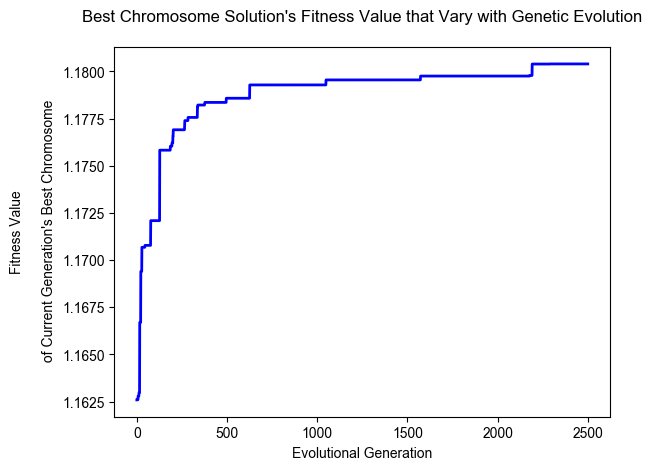

In [31]:
plt.plot(ga_instance.best_solutions_fitness, linewidth=2, color='b')
plt.title("Best Chromosome Solution's Fitness Value that Vary with Genetic Evolution\n")
plt.xlabel('Evolutional Generation')
plt.ylabel("Fitness Value\n\n of Current Generation's Best Chromosome")
plt.show()

### 返回最优解的适应度和index

In [32]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print('最优解适应度值 = {solution_fitness}'.format(solution_fitness=solution_fitness))
# print('最优解索引 : {solution_idx}'.format(solution_idx=solution_idx))

最优解适应度值 = 1.1803938105272282


### 给BP神经网络用遗传算法找出的最佳权重进行训练

In [33]:
# 训练集输入
train_inputs = torch.from_numpy(X_train.values).float()

# 训练集输出
train_outputs = torch.from_numpy(y_train.values).float()
train_outputs = train_outputs.reshape((train_outputs.shape[0], 1))

In [34]:
# 把遗传算法得到的最优解（权重向量）转换为神经网络模型的权重字典形式 存在 best_solution_weights变量中
best_solution_weights = torchga.model_weights_as_dict(model=model, weights_vector=solution)

# 更新模型的权重
model.load_state_dict(best_solution_weights)

<All keys matched successfully>

In [35]:
# 算训练集损失
# 进行预测 这里 train_predictions输出的是概率 然后用BCEWithLogitsLoss()算了损失

train_predictions = model(train_inputs)
# print('Predictions : n', train_predictions) # 可以打印过程

train_loss = loss_function(train_predictions, train_outputs).detach().numpy()

print('Training Loss:', loss_function(train_predictions, train_outputs).detach().numpy())

Training Loss: 0.63085675


In [36]:
# 算训练集模型准确率
# accuracy = torch.sum(torch.max(predictions, axis=1).indices == data_outputs) / len(data_outputs)
# print('Training and Validation Accuracy: ', accuracy.detach().numpy())

# predicted_labels = (predictions > 0.5).float()
# true_labels = torch.argmax(data_outputs, dim=1)
# accuracy = (predicted_labels == true_labels).sum().item() / len(true_labels)

# a = torch.max(predictions, axis=1)
# b = torch.max(data_outputs, axis=1)

# accuracy = torch.true_divide(torch.sum(a.indices == b.indices), len(data_outputs))

    
# 将概率值转换为包含0和1的预测目标列
train_predicted_labels = (train_predictions >= threshold).int()
train_true_labels = train_outputs
train_accuracy = (train_predicted_labels == train_true_labels).sum().item() / len(train_true_labels)

print('Training Accuracy:', train_accuracy)

Training Accuracy: 0.9475587703435805


### 训练过程中损失和准确率随着epoch（世代进化）增加而变化的图像

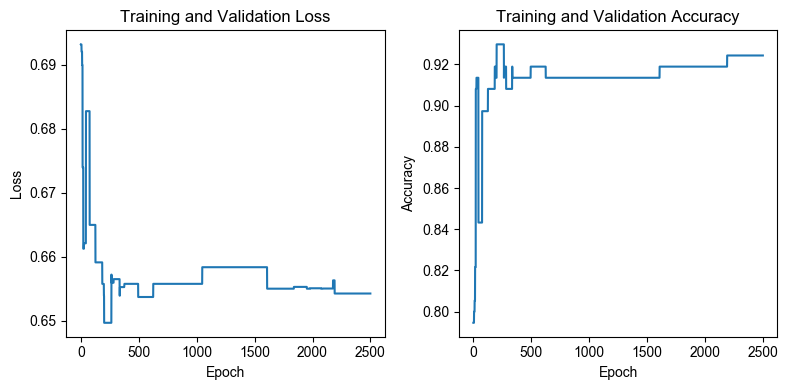

In [37]:
import matplotlib.pyplot as plt

# 绘制损失和准确率随着epoch增加而变化的图像
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(range(len(losses)), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(range(len(accuracies)), accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.tight_layout()
plt.show()

### GA-BP模型最终在测试集上的表现

In [38]:
# 将测试集转换为张量并调整形状
test_inputs = torch.from_numpy(X_test.values).float()

# 将输出数据转换为张量
test_outputs = torch.from_numpy(y_test.values).float()
test_outputs = test_outputs.reshape((test_outputs.shape[0], 1))

In [39]:
# test_inputs

In [40]:
# test_outputs

In [41]:
# 算测试集集损失
# 进行预测 这里 train_predictions输出的是概率 然后用BCEWithLogitsLoss()算了损失

test_predictions = model(test_inputs)
# print('Predictions : n', test_predictions) # 可以打印过程

test_loss = loss_function(test_predictions, test_outputs).detach().numpy()

print('Testing Loss:', loss_function(test_predictions, test_outputs).detach().numpy())

Testing Loss: 0.625505


In [42]:
# 算测试集准确率 
    
# 将概率值转换为包含0和1的预测目标列
test_predicted_labels = (test_predictions >= threshold).int()
test_true_labels = test_outputs
test_accuracy = (test_predicted_labels == test_true_labels).sum().item() / len(test_true_labels)

print('Testing Accuracy:', test_accuracy)

Testing Accuracy: 0.9243243243243243


In [43]:
test_true_labels = np.ravel(test_true_labels) 
test_predicted_labels = np.ravel(test_predicted_labels)


GA-BP Neural Network
Average Precision: 0.785993685993686
AUROC: 0.9122325043377675
Accuracy: 0.9243243243243243
Geometric Mean: 0.9118143652457964
Matthews Correlation Coefficient: 0.815205672394865


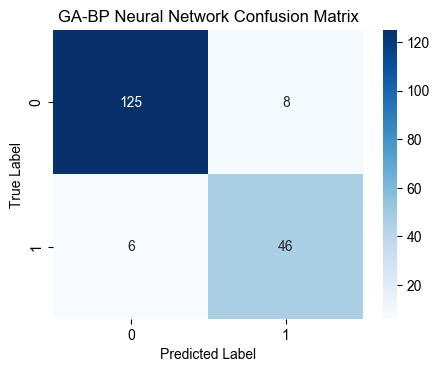

In [44]:
# 计算测试集 平均精度 ROC曲线下面积 准确率 
average_precision = average_precision_score(test_true_labels, test_predicted_labels)
auc_score = roc_auc_score(test_true_labels, test_predicted_labels)
geometric_mean = geometric_mean_score(test_true_labels, test_predicted_labels)
mcc = matthews_corrcoef(test_true_labels, test_predicted_labels)
print()
print('GA-BP Neural Network')
print('Average Precision:', average_precision)
print('AUROC:', auc_score)
print('Accuracy:', test_accuracy)
print('Geometric Mean:', geometric_mean)
print('Matthews Correlation Coefficient:', mcc)

# 混淆矩阵
cm = confusion_matrix(test_true_labels, test_predicted_labels)

plt.figure(figsize=(5, 3.75))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('GA-BP Neural Network Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## 其他分类模型预测测试集的表现


Binary Classification (SVM)
Average Precision: 0.652920052920053
AUROC: 0.8160786581839213
Accuracy: 0.8702702702702703
Geometric Mean: 0.8066381619718564
Matthews Correlation Coefficient: 0.6674469708698278


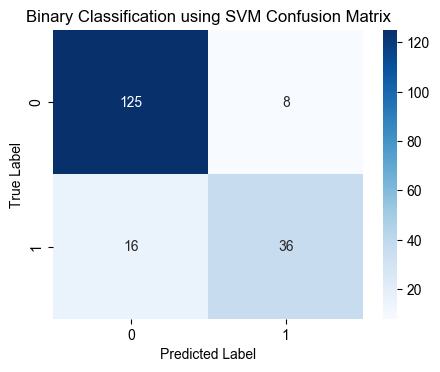

In [45]:
from sklearn.svm import SVC

def Binary_Classification_SVM(X_train, X_test, y_train, y_test):
    
    # 拟合支持向量机模型
    svm = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, random_state=None)
    svm.fit(X_train, y_train)
    
    # 在验证集上进行预测
    y_pred = svm.predict(X_test)
    
    # 看模型表现
    average_precision = average_precision_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    geometric_mean = geometric_mean_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    print()
    print('Binary Classification (SVM)')
    print('Average Precision:', average_precision)
    print('AUROC:', auc_score)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Geometric Mean:', geometric_mean)
    print('Matthews Correlation Coefficient:', mcc)
    
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5, 3.75))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Binary Classification using SVM Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()    
    
Binary_Classification_SVM(X_train, X_test, y_train, y_test)




K-Nearest Neighbours
Average Precision: 0.652920052920053
AUROC: 0.8160786581839213
Accuracy: 0.8702702702702703
Geometric Mean: 0.8066381619718564
Matthews Correlation Coefficient: 0.6674469708698278


Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


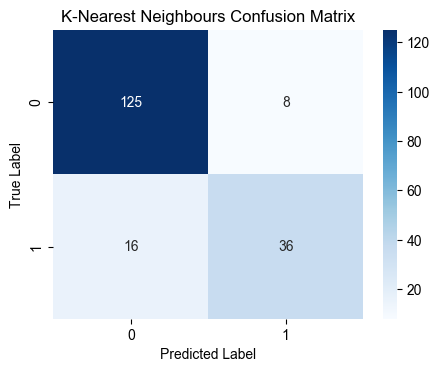

In [46]:
from sklearn.neighbors import KNeighborsClassifier

def KNN(X_train, X_test, y_train, y_test):
    
    # 拟合KNN模型
    knn = KNeighborsClassifier(n_neighbors=10, weights='uniform', algorithm='auto', leaf_size=35, p=2, metric='minkowski')
    knn.fit(X_train, y_train)
    
    # 在测试集上进行预测
    y_pred = knn.predict(X_test)
    
    # 看表现
    average_precision = average_precision_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    geometric_mean = geometric_mean_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    print()
    print('K-Nearest Neighbours')
    print('Average Precision:', average_precision)
    print('AUROC:', auc_score)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Geometric Mean:', geometric_mean)
    print('Matthews Correlation Coefficient:', mcc)
    
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5, 3.75))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('K-Nearest Neighbours Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()    
    
KNN(X_train, X_test, y_train, y_test)


Gradient Boosting
Average Precision: 0.6403326403326404
AUROC: 0.7888953152111047
Accuracy: 0.8648648648648649
Geometric Mean: 0.7695777123902109
Matthews Correlation Coefficient: 0.6493311948292405


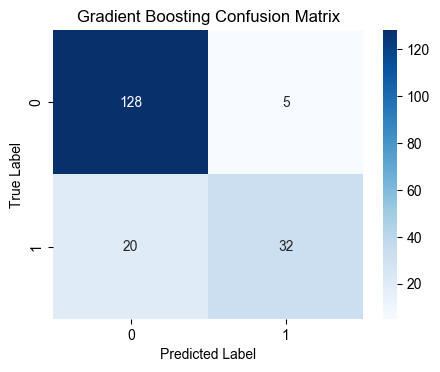

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

def Gradient_Boosting(X_train, X_test, y_train, y_test):
    
    # 拟合梯度提升模型
    gb = GradientBoostingClassifier(loss='deviance', learning_rate=0.02, n_estimators=50, 
                                    subsample=1.0, criterion='friedman_mse', min_samples_split=2, 
                                    min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, 
                                    random_state=100, verbose=0, validation_fraction=0.1, tol=0.001)
    gb.fit(X_train, y_train)
    
    # 在测试集上进行预测
    y_pred = gb.predict(X_test)
    
    # 看表现
    average_precision = average_precision_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    geometric_mean = geometric_mean_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    print()
    print('Gradient Boosting')
    print('Average Precision:', average_precision)
    print('AUROC:', auc_score)
    print('Accuracy:', accuracy_score(y_test, y_pred)) 
    print('Geometric Mean:', geometric_mean)
    print('Matthews Correlation Coefficient:', mcc)
    
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5, 3.75))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Gradient Boosting Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()    
    
Gradient_Boosting(X_train, X_test, y_train, y_test)


Naive Bayes
Average Precision: 0.7013249513249513
AUROC: 0.8917727009832273
Accuracy: 0.8864864864864865
Geometric Mean: 0.8916909677432464
Matthews Correlation Coefficient: 0.7432612110490803


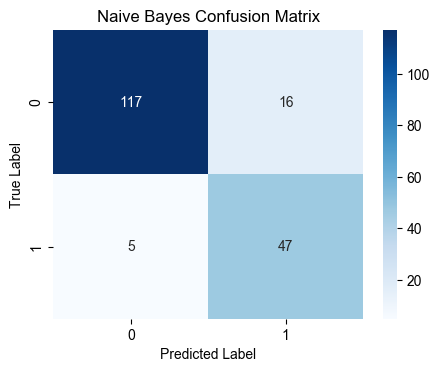

In [48]:
from sklearn.naive_bayes import GaussianNB

def Naive_Bayes(X_train, X_test, y_train, y_test):
    
    # 拟合朴素贝叶斯模型
    nb = GaussianNB(priors=None, var_smoothing=1e-09)
    nb.fit(X_train, y_train)
    
    # 在验证集上进行预测
    y_pred = nb.predict(X_test)
    
    # 看表现
    average_precision = average_precision_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    geometric_mean = geometric_mean_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    print()
    print('Naive Bayes')
    print('Average Precision:', average_precision)
    print('AUROC:', auc_score)
    print('Accuracy:', accuracy_score(y_test, y_pred)) 
    print('Geometric Mean:', geometric_mean)
    print('Matthews Correlation Coefficient:', mcc)
    
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5, 3.75))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Naive Bayes Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()    
    
Naive_Bayes(X_train, X_test, y_train, y_test)


BP Neural Network
Average Precision: 0.6951521451521452
AUROC: 0.8683487565066512
Accuracy: 0.8864864864864865
Geometric Mean: 0.8673600613342112
Matthews Correlation Coefficient: 0.7245421828007883


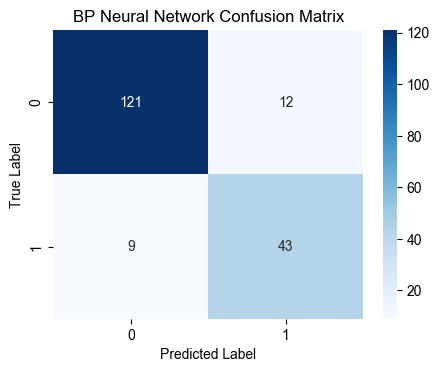

In [49]:
from sklearn.neural_network import MLPClassifier

def Neural_Network(X_train, X_test, y_train, y_test):
    
    # 拟合传统的BP神经网络模型
    nn = MLPClassifier(random_state=2345, max_iter=1000)
    nn.fit(X_train, y_train)
    
    # 在验证集上进行预测
    y_pred = nn.predict(X_test)
    
    # 看表现
    average_precision = average_precision_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    geometric_mean = geometric_mean_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    print()
    print('BP Neural Network')
    print('Average Precision:', average_precision)
    print('AUROC:', auc_score)
    print('Accuracy:', accuracy_score(y_test, y_pred))  
    print('Geometric Mean:', geometric_mean)
    print('Matthews Correlation Coefficient:', mcc)
    
    # import pydotplus
    # from sklearn.tree import export_graphviz

    # 绘制网络结构图（不想画了）
    # fig, ax = plt.subplots()
    # for i in range(len(nn.coefs_)):
    #    layer_weights = nn.coefs_[i]
    #    for j in range(layer_weights.shape[1]):
    #        ax.arrow(i, j, i+1, j, head_width=0.1, head_length=0.1, fc='black', ec='black')
    # ax.set_xlabel('Layer')
    # ax.set_ylabel('Neuron')
    # ax.set_title('MLP Network Structure')
    # plt.show()
    
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5, 3.75))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('BP Neural Network Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()    
    
Neural_Network(X_train, X_test, y_train, y_test)